In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import autoplot as atp
import seaborn as sns
import pandas as pd
import numpy as np
from math import *
import sys

autoplot v0.3.9


Considerações Iniciais:
Usar o K-Means para separar os herois em 3 categorias (ou clusters) diferentes em NLP e Numérico

## Leitura e Descrição dos dados

**Leitura de Csv e preenchimento de Missing Data**

In [2]:
data = pd.read_csv('superheroes_nlp_dataset.csv')
data = data.fillna(" ")

**Descrição dos Dados de todo o Dataset**

Insira texto aqui

**Prévia do Dataset**

In [3]:
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",,85,30,60,60,...,0,0,0,0,0,1,0,0,0,1
1,514A (Gotham),Bruce Wayne,,10,He was one of the many prisoners of Indian Hil...,,100,20,30,50,...,0,0,0,0,1,0,1,0,0,1
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0,1,0,0,1,1,1,1,1,1
3,Aa,Aa,,12,Aa is one of the more passive members of the P...,,80,50,55,45,...,0,0,0,0,0,0,0,0,0,0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,,80,10,25,40,...,0,0,1,0,0,0,0,0,0,0


## Preparação para KMeans

**Calculo de número de Clusters**

## Separação do Dataset para testes

**Utilizando apenas scores dos Herois**

In [4]:
short_data = data[["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]]

In [5]:
short_data.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
X_1 = np.array(short_data)

X_1

#k = calculate_wcss(X)
X_1

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


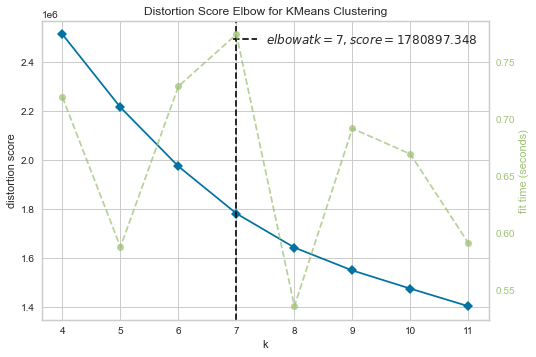

In [7]:
visualizer.fit(X_1)
visualizer.show()  

In [8]:
kmeans = KMeans(n_clusters=7,random_state=0)
kmeans.fit(X_1)

KMeans(n_clusters=7, random_state=0)

In [9]:
predict = kmeans.predict(X_1)
short_data["cl_class"] = predict
print(predict)

[1 1 0 ... 5 5 4]


<ipython-input-9-44419386f730>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["cl_class"] = predict


D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg,

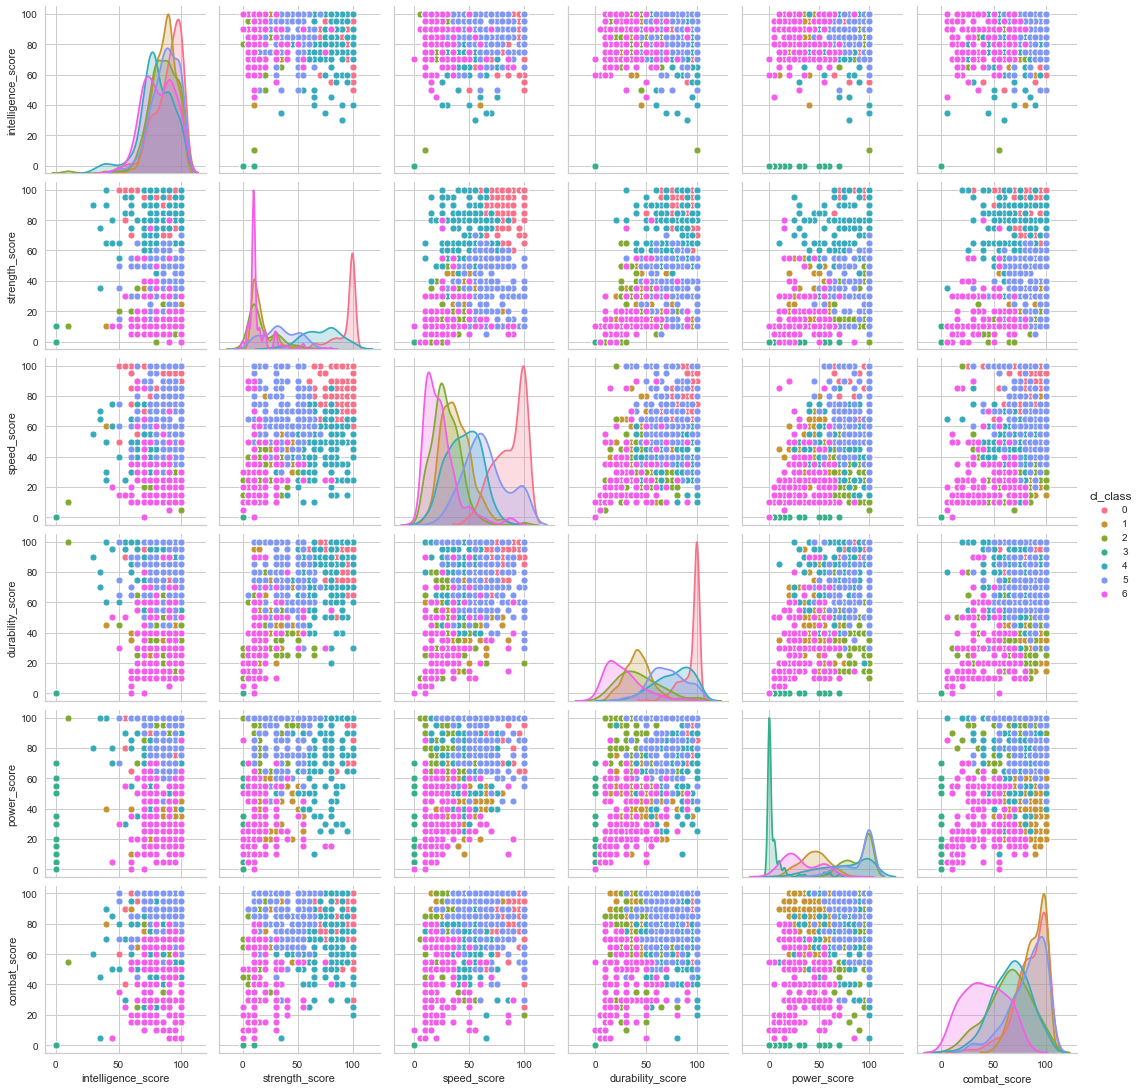

In [10]:
sns.pairplot(data = short_data, hue = "cl_class")

## KMeans

**Transforma as labels em uma coluna**

## Aplicação do NLP

**Imports**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

**Separação das colunas**

In [12]:
text_data = data[["name","real_name","full_name","history_text","powers_text"]]
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [13]:
text_data.describe()

,name,real_name,full_name,history_text,powers_text
count,1450,1450,1450,1450,1450
unique,1449,1069,841,1350,1062
top,,,,,
freq,2,149,494,90,364


**Seleção de Stopwords, Remoção de Missing Data e Aplicação de Lowercase**

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
text_data = text_data.fillna('').astype(str).apply(lambda x: x.str.lower())

In [15]:
text_data.head(5)

,name,real_name,full_name,history_text,powers_text
0,3-d man,"delroy garrett, jr.","delroy garrett, jr.","delroy garrett, jr. grew up to become a track ...",
1,514a (gotham),bruce wayne,,he was one of the many prisoners of indian hil...,
2,a-bomb,richard milhouse jones,richard milhouse jones,"richard ""rick"" jones was orphaned at a young ...","on rare occasions, and through unusual circu..."
3,aa,aa,,aa is one of the more passive members of the p...,
4,aaron cash,aaron cash,aaron cash,aaron cash is the head of security at arkham a...,


**Compilado das colunas de texto**

In [16]:
text_data["comp"] = text_data["name"] + " " + text_data["real_name"] + " " + text_data["full_name"] + " " + text_data["history_text"] + " " + text_data["powers_text"]

**Vetorização e remoção de stopwords**

In [17]:
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(text_data.comp.values)
features = vec.transform(text_data.comp.values)

**Predição por K-Means**

In [18]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances=True, verbose=0, random_state=None, n_jobs=1)
km.fit(features)
predicted = km.predict(features)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
predicted

array([1, 0, 0, ..., 1, 1, 1])

In [20]:
from sklearn.decomposition import PCA
clusters = km.predict(features)
pca = PCA(n_components=2)
two_dim = pca.fit_transform(features.todense())
scatter_x = two_dim[:, 0] 
scatter_y = two_dim[:, 1] 

**Plot dos dados com as cores de clusters**

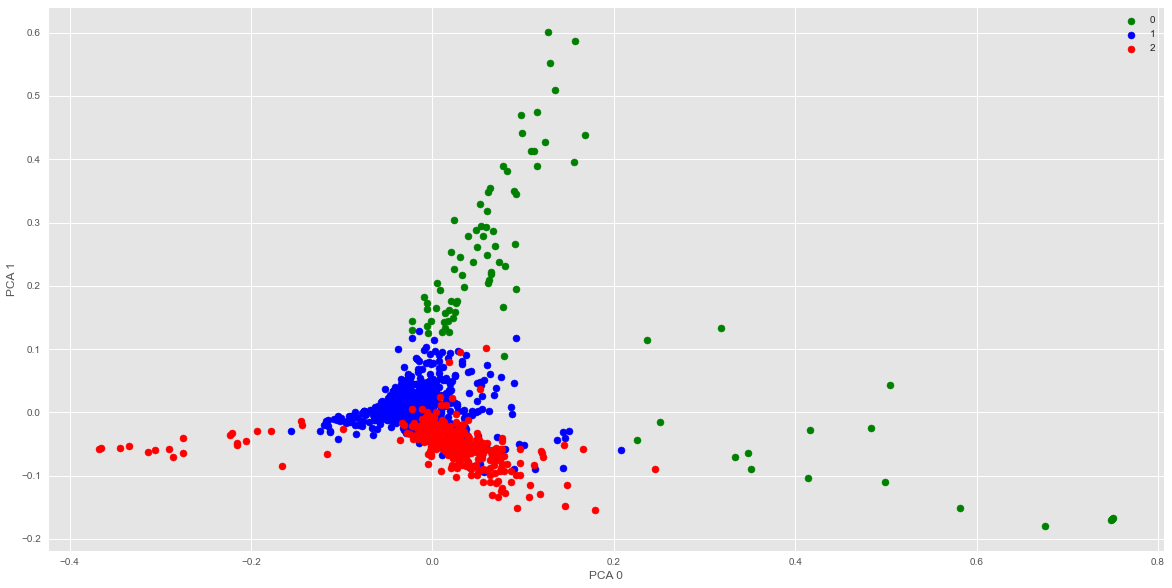

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

cmap = {0: 'green', 1: 'blue', 2: 'red'}

for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [22]:
text_data["k-classes"] = predicted

In [23]:
text_data.head(5)

,name,real_name,full_name,history_text,powers_text,comp,k-classes
0,3-d man,"delroy garrett, jr.","delroy garrett, jr.","delroy garrett, jr. grew up to become a track ...",,"3-d man delroy garrett, jr. delroy garrett, jr...",1
1,514a (gotham),bruce wayne,,he was one of the many prisoners of indian hil...,,514a (gotham) bruce wayne he was one of the ...,0
2,a-bomb,richard milhouse jones,richard milhouse jones,"richard ""rick"" jones was orphaned at a young ...","on rare occasions, and through unusual circu...",a-bomb richard milhouse jones richard milhouse...,0
3,aa,aa,,aa is one of the more passive members of the p...,,aa aa aa is one of the more passive members ...,1
4,aaron cash,aaron cash,aaron cash,aaron cash is the head of security at arkham a...,,aaron cash aaron cash aaron cash aaron cash is...,1


In [24]:
data_comp = pd.DataFrame(columns = ['nlp', 'nbr']) 
data_comp["nlp"] = text_data["k-classes"]
data_comp["nbr"] = short_data["cl_class"]

In [25]:
data_comp.head(5)

,nlp,nbr
0,1,1
1,0,1
2,0,0
3,1,2
4,1,6


## KMeans normalizado e com colunas de Numéricas

In [26]:
from sklearn import preprocessing
df = pd.read_csv('superheroes_nlp_dataset.csv')

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
df.head(5)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,85,30,60,60,40,70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,100,20,30,50,35,100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,80,100,80,100,100,80,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,80,50,55,45,100,55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,10,25,40,30,50,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df = df.fillna(0)
x_array = np.array(df)
x_array.shape

(1450, 56)

**Normalização dos Dados**

In [29]:
normalized_X = preprocessing.normalize(x_array)

In [30]:
normalized_X

array([[0.57533647, 0.20305993, 0.40611986, ..., 0.        , 0.        ,
        0.00676866],
       [0.63210165, 0.12642033, 0.1896305 , ..., 0.        , 0.        ,
        0.00632102],
       [0.36058724, 0.45073405, 0.36058724, ..., 0.00450734, 0.00450734,
        0.00450734],
       ...,
       [0.45515543, 0.23955549, 0.47911098, ..., 0.00479111, 0.00479111,
        0.00479111],
       [0.45205337, 0.06027378, 0.60273783, ..., 0.        , 0.        ,
        0.        ],
       [0.25162843, 0.44733943, 0.41938071, ..., 0.        , 0.00559174,
        0.00559174]])

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

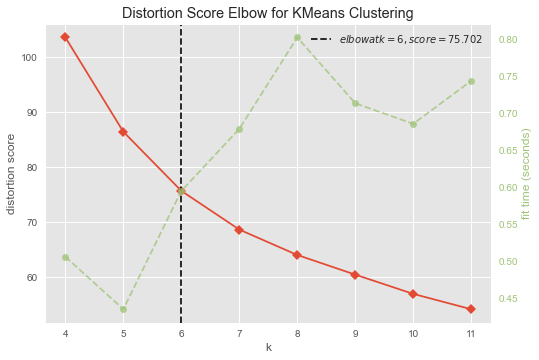

In [32]:
visualizer.fit(normalized_X)
visualizer.show()  

**Número ideal de clusters**

In [33]:
number = 6

In [34]:
kme = KMeans(n_clusters=6,random_state=0)
kme.fit(normalized_X)

KMeans(n_clusters=6, random_state=0)

In [35]:
predicted2 = kme.predict(normalized_X)
predicted2

array([0, 0, 5, ..., 5, 2, 5])

<ipython-input-36-dd2173a57300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["cl_class_normalized"] = predicted2
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping densit

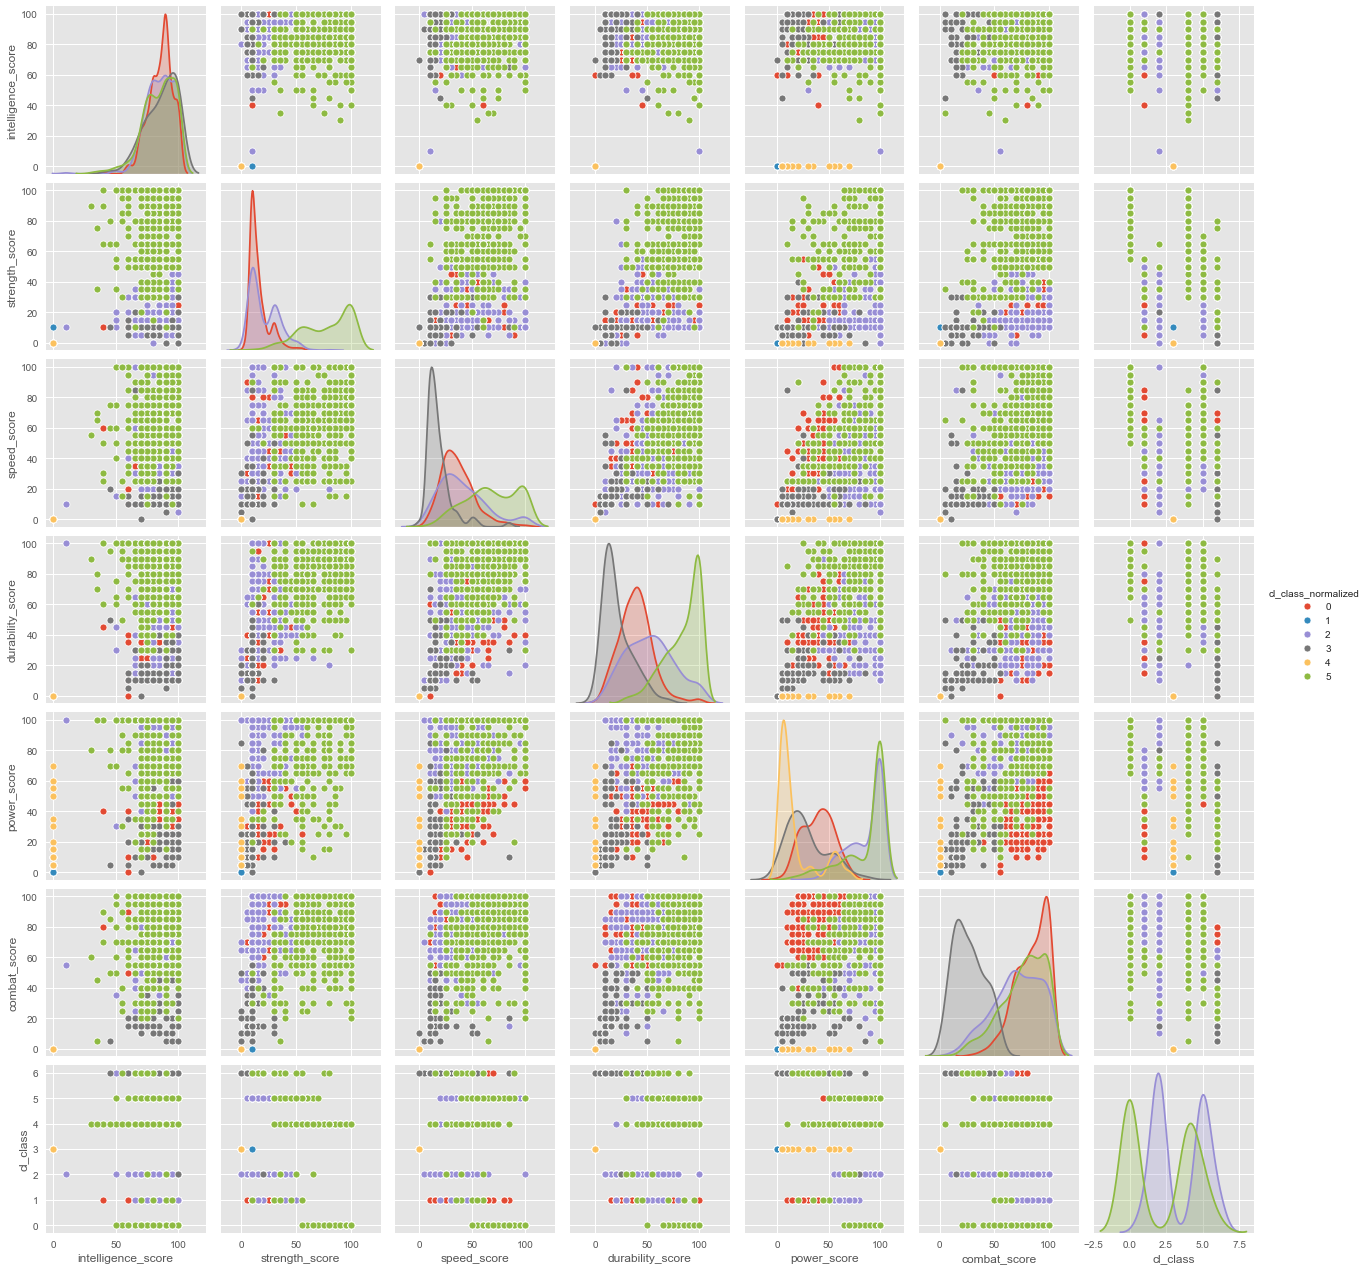

In [36]:
short_data["cl_class_normalized"] = predicted2
sns.pairplot(data = short_data, hue = "cl_class_normalized")

In [37]:
df.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.086207,0.073103,0.072414,0.048276,...,0.254483,0.293793,0.391034,0.413103,0.408966,0.368966,0.488276,0.508276,0.536552,0.504138
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.280766,0.260396,0.259261,0.214423,...,0.435720,0.455655,0.488150,0.492561,0.491813,0.482691,0.500035,0.500104,0.498834,0.500155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Aplicando PCA**

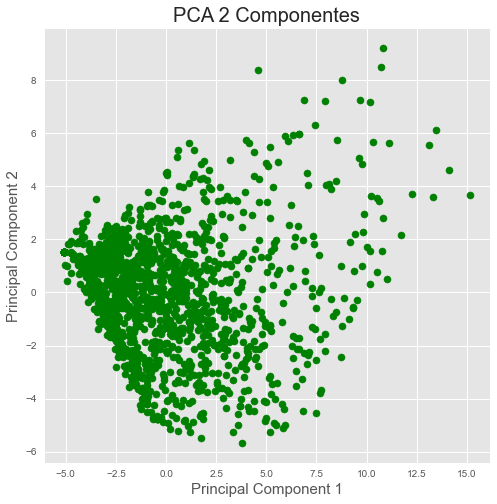

In [50]:
## Utilizando modelo PCA

x1 = df.values
x = StandardScaler().fit_transform(x1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

df_pca = pd.DataFrame(data=principalComponents, columns=["pc1","pc2"])
df_pca.head(5)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
colors = ['r', 'g','b']
ax.set_title('PCA 2 Componentes', fontsize = 20)
ax.scatter(df_pca['pc1'], df_pca['pc2'], c = "green", s = 50)

**Utilizando NLP**

In [38]:
data["full"] = data[data.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [41]:
data["full"]

0       Delroy Garrett, Jr.,Delroy Garrett, Jr.,6,Delr...
1       Bruce Wayne, ,10,He was one of the many prison...
2       Richard Milhouse Jones,Richard Milhouse Jones,...
3       Aa, ,12,Aa is one of the more passive members ...
4       Aaron Cash,Aaron Cash,5,Aaron Cash is the head...
                              ...                        
1445    Zatanna Zatara,Zatanna Zatara,10,Zatanna is th...
1446    DWN-∞: Zero,DWN-∞: Zero,18, Zero was created b...
1447    Hunter Zolomon, ,20,Hunter Zolomon is better k...
1448    Hunter Zolomon,Hunter Zolomon,9, Hunter Zolomo...
1449     , ,5,Zzzax was the product of an accident tha...
Name: full, Length: 1450, dtype: object

In [44]:
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(data.full.values)
features = vec.transform(text_data.comp.values)

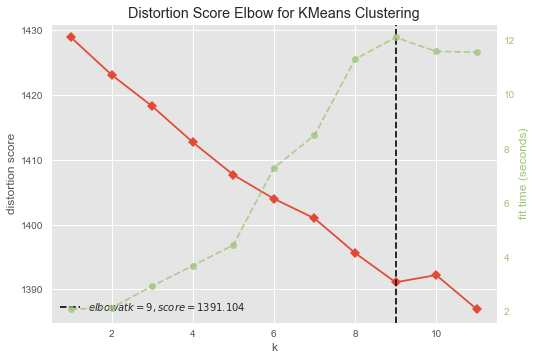

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(features)
visualizer.show()  

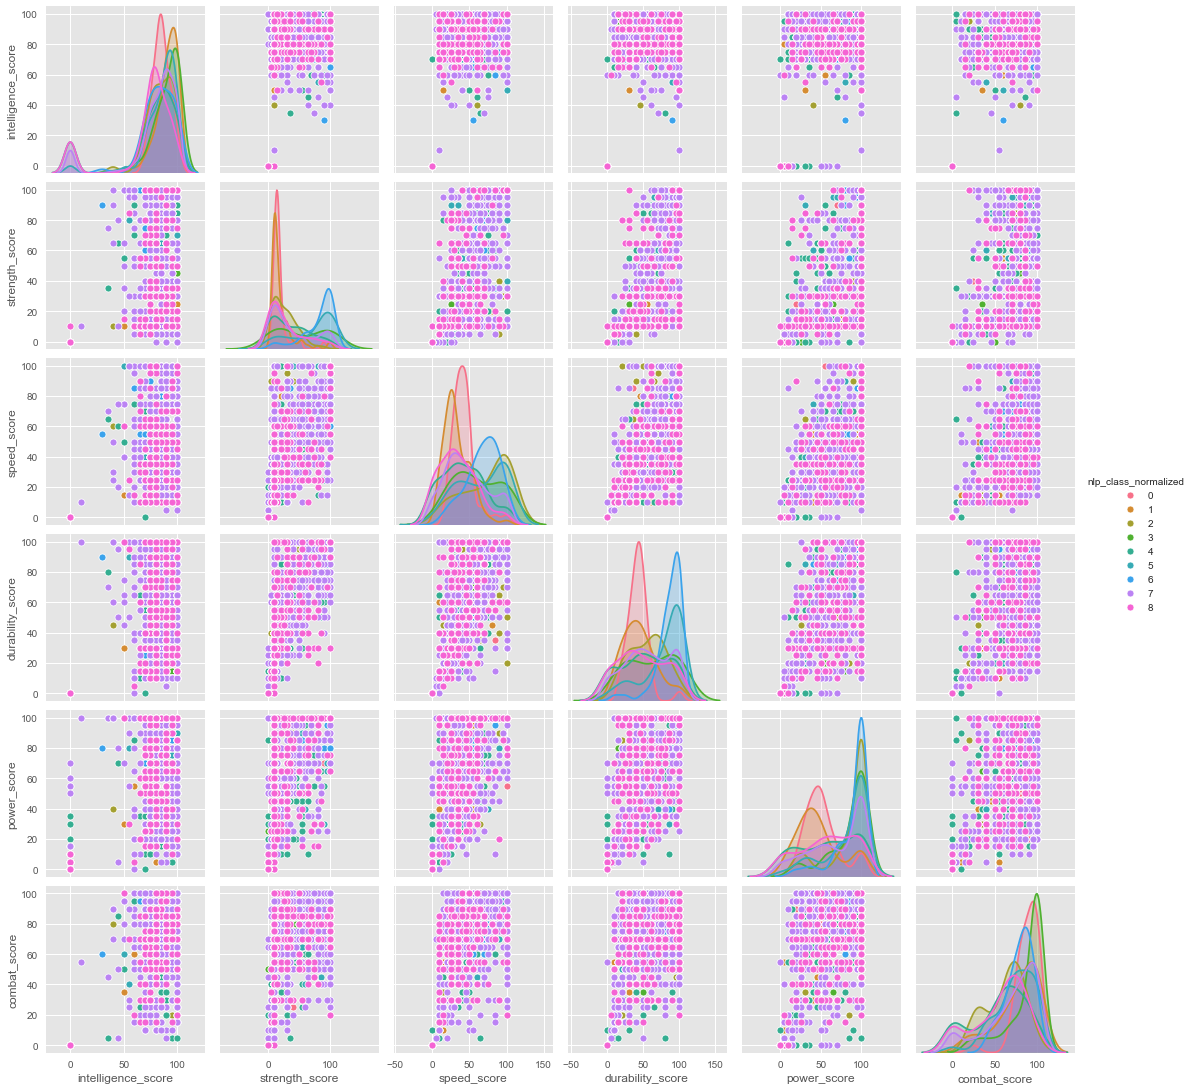

In [47]:
kme = KMeans(n_clusters=9,random_state=0)
kme.fit(features)

predicted3 = kme.predict(features)
predicted3

data["nlp_class_normalized"] = predicted3
sns.pairplot(data = data, hue = "nlp_class_normalized")